<a href="https://colab.research.google.com/github/tackulus/204383/blob/main/Code03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **03 Histogram Equalization**

> **204383 Image Processing** 

---

> **Kasidis Torcharoen (610510531)** \\
**Kittisak Thammawong (610510611)**

In [1]:
import numpy as np
import pandas as pd
import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 
import matplotlib.pylab as plt

In [2]:
url = "https://raw.githubusercontent.com/tackulus/204383/main/image/0201.jpg"

image = io.imread(url)
image = cv.resize(image, (600, 400))
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

## **Method 1 : Using implemented function.**

---

In [3]:
def histeq1(im):
    """ Histogram equalization of a color image.  """

    # image's luminance
    im_new = cv.cvtColor(im, cv.COLOR_RGB2YUV)
    luminance = im_new[:,:,0]

    # histogram
    imhist, bins = np.histogram(luminance.flatten(), bins=256, range=(0,256))

    # cumulative distribution function
    # cumulative histogram
    cdf = imhist.cumsum()

    # normalized cumulative histogram
    normal_cdf = ( cdf - cdf.min() ) / ( cdf.max() - cdf.min() )
    
    f = (255 * normal_cdf).astype(int)
    adjusted = f[luminance]
    im_new[:,:,0] = adjusted
    im_new = cv.cvtColor(im_new, cv.COLOR_YUV2RGB)

    return im_new.astype("uint8")

In [ ]:
new_image = histeq1(image)
frame = cv.hconcat((image, new_image))
cv2_imshow(frame)

In [5]:
#@title  { display-mode: "form" }

im_new = cv.cvtColor(image, cv.COLOR_RGB2YUV)
luminance = np.array(im_new[:,:,0])
imhist, bins = np.histogram(luminance.flatten(), bins=256, range=(0,256))
cdf = imhist.cumsum()
normal_cdf = ( cdf - cdf.min() ) / ( cdf.max() - cdf.min() )
f = (255 * normal_cdf).astype(int)
adjusted = f[luminance]
im_new[:,:,0] = adjusted
im_new = cv.cvtColor(im_new, cv.COLOR_YUV2RGB)
imagex = im_new.astype("uint8")

imhistx, binsx = np.histogram(adjusted.flatten(), bins=256, range=(0,256))
cdfx = imhistx.cumsum()
normal_cdfx = 255 * ( cdfx - cdfx.min() ) / ( cdfx.max() - cdfx.min() )
normal_cdfx = normal_cdfx.astype(int)

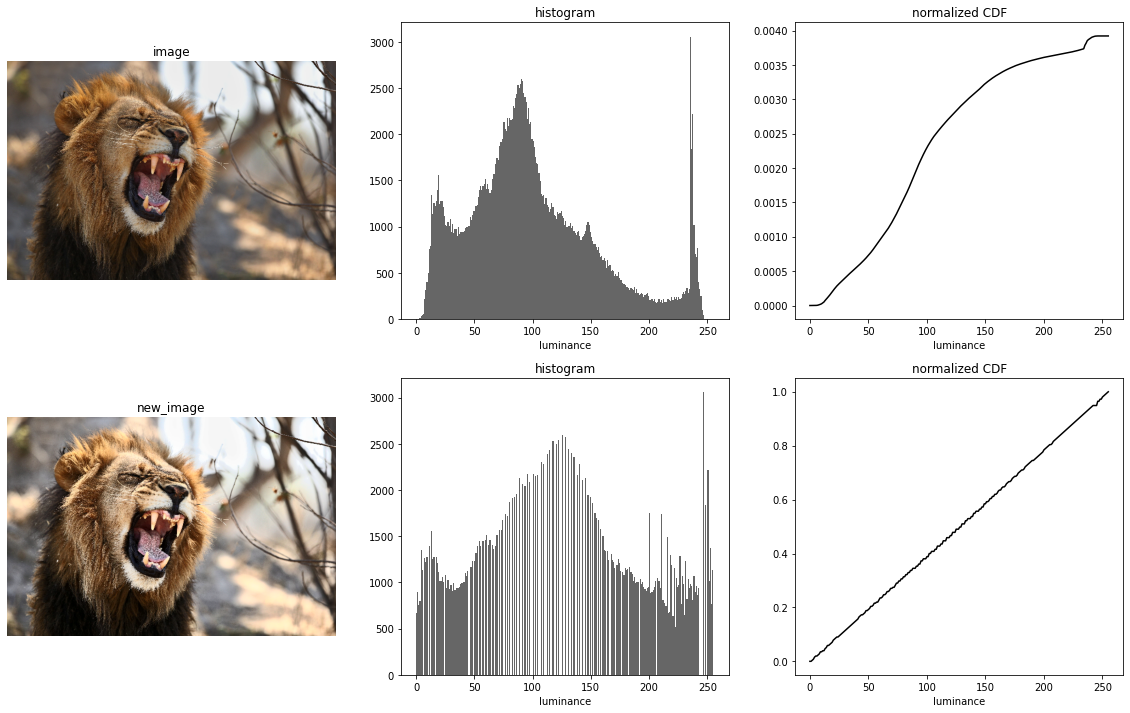

In [6]:
#@title  { display-mode: "form" }

fig, ax = plt.subplots(2, 3, figsize=(20, 12))

pact = zip([image , imagex],
           [luminance, adjusted],
           [normal_cdf, normal_cdfx])

for i, (imx, lum, normal) in enumerate(pact):
    im = cv.cvtColor(imx, cv.COLOR_RGB2BGR)

    lst = ["image", "new_image"]
    ax[i,0].set_title(lst[i])
    ax[i,0].axis("off")
    ax[i,0].imshow(im)

    ax[i,1].set_title("histogram")
    ax[i,1].hist(lum.flatten(), bins=bins, color='k', alpha=0.6)
    ax[i,1].set_xlabel("luminance")

    ax[i,2].set_title("normalized CDF")
    ax[i,2].plot(normal / 255.0, c='k')
    ax[i,2].set_xlabel("luminance")
    
plt.show()

## **Method 2 : Using build-in function** *cv.equalizeHist* .

---

In [7]:
def histeq2(im):
    """ Histogram equalization of a color image.  """

    im_new = cv.cvtColor(im, cv.COLOR_RGB2YUV)
    im_new[:,:,0] = cv.equalizeHist(im_new[:,:,0])
    im_new = cv.cvtColor(im_new, cv.COLOR_YUV2RGB)

    return im_new

In [ ]:
new_image = histeq2(image)
frame = cv.hconcat((image, new_image))
cv2_imshow(frame)